---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
        embed-resources: true
---

## Introduction and Motivation
This is the page for exploratory data analysis. After making our processed data files, we wanted to explore the distributions of various features, the correlation between aspects of songs, and the statistical significance of differences between different categories. This will help us understand the data better, look for any preliminary interesting patterns and insights, and make informed decisions about the models we build as we go forward. Specifically, we looked at the song lyrics and the metadata about the music, their relationships, and their contribution onn song popularity and chart rankings. It will also allow us to look for anomalies to make sure that our data is suitable for ML tasks.

## Overview of Methods
This section uses data visualization, aggregation techniques, and conducts statistical tests to do a preliminary analysis of the data.

## Code

### Step 1: Import data and clean data
- Imported the data using pandas
- Isolated the rows that I thought might be helpful to analyze for this section of the analysis
- Replaced the null values in genre with "None listed" so I can still use the rest of the data (4 rows)
- Change VADER results into indvidual columns
- Displayed the results

In [2]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/processed-data/artist_song_masterlist.csv')
df.head()

Track ID          Track Name  Song Popularity  \
0  0WbMK4wrZ1wFSty9F7FCgu    Good Luck, Babe!             93.0   
1  6AI3ezQ4o3HUoP6Dhudph3         Not Like Us             88.0   
2  2FQrifJ1N335Ljm3TjTVVf  A Bar Song (Tipsy)             86.0   
3  2HRqTpkrJO5ggZyyK6NPWz            Espresso             88.0   
4  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER             96.0   

                  Album Song Release Date  Duration (ms)            Artists  \
0      Good Luck, Babe!        2024-04-05       218423.0      Chappell Roan   
1           Not Like Us        2024-05-04       274192.0     Kendrick Lamar   
2    A Bar Song (Tipsy)        2024-04-12       171291.0          Shaboozey   
3        Short n' Sweet        2024-08-23       175459.0  Sabrina Carpenter   
4  HIT ME HARD AND SOFT        2024-05-17       210373.0      Billie Eilish   

   Explicit  Song Rank               Artist ID  ... Genre_trap latino  \
0     False          1  7GlBOeep6PqTfFi59PTUUN  ...                 0   
1      True          2  2YZyLoL8N0Wb9xBt1NhZWg  ...                 0   
2      True          3  3y2cIKLjiOlp1Np37WiUdH  ...                 0   
3      True          4  74KM79TiuVKeVCqs8QtB0B  ...                 0   
4     False          5  6qqNVTkY8uBg9cP3Jd7DAH  ...                 0   

   Genre_trap queen  Genre_twee pop Genre_uk alternative pop  \
0                 0               0                        0   
1                 0               0                        0   
2                 0               0                        0   
3                 0               0                        0   
4                 0               0                        0   

   Genre_uk contemporary r&b  Genre_uk pop Genre_urbano latino  \
0                          0             0                   0   
1                          0             0                   0   
2                          0             0                   0   
3                          0             0                   0   
4                          0             0                   0   

   Genre_viral rap  Genre_west coast rap  Genre_wonky  
0                0                     0            0  
1                0                     1            0  
2                0                     0            0  
3                0                     0            0  
4                0                     0            0  

[5 rows x 146 columns]

In [4]:
df_cl = df[['Track Name','Song Popularity','Album','Song Release Date','Duration (ms)','Artists','Explicit','Song Rank','Artist ID','Genres','Followers','Popularity','Lyrics','Total Artists On Song','Lyrics Word Count','Sentiment (VADER)']]
df_cl.loc[df_cl['Genres'].isna(), 'Genres'] = 'None Listed'
df_cl.loc[df_cl['Lyrics'] == "Lyrics not found!", 'Lyrics Word Count'] = 0
df_cl.loc[df_cl['Lyrics'] == "Lyrics not found!", 'Lyrics'] = ' '
df_cl = df_cl.dropna(subset='Lyrics')
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 97
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Track Name             94 non-null     object 
 1   Song Popularity        94 non-null     float64
 2   Album                  94 non-null     object 
 3   Song Release Date      94 non-null     object 
 4   Duration (ms)          94 non-null     float64
 5   Artists                94 non-null     object 
 6   Explicit               94 non-null     bool   
 7   Song Rank              94 non-null     int64  
 8   Artist ID              94 non-null     object 
 9   Genres                 94 non-null     object 
 10  Followers              94 non-null     int64  
 11  Popularity             94 non-null     int64  
 12  Lyrics                 94 non-null     object 
 13  Total Artists On Song  94 non-null     float64
 14  Lyrics Word Count      94 non-null     int64  
 15  Sentiment (VA

In [5]:
df_cl["Sentiment (VADER)"] = df_cl["Sentiment (VADER)"].apply(ast.literal_eval)

# Expand the dictionary into separate columns
sentiment_df = pd.json_normalize(df_cl["Sentiment (VADER)"])
sentiment_df = sentiment_df.reset_index(drop=True)

# Combine the expanded columns back with the original DataFrame
df_cl = df_cl.reset_index(drop=True)
df_cl = pd.concat([df_cl.drop(columns=["Sentiment (VADER)"]), sentiment_df], axis=1)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Track Name             94 non-null     object 
 1   Song Popularity        94 non-null     float64
 2   Album                  94 non-null     object 
 3   Song Release Date      94 non-null     object 
 4   Duration (ms)          94 non-null     float64
 5   Artists                94 non-null     object 
 6   Explicit               94 non-null     bool   
 7   Song Rank              94 non-null     int64  
 8   Artist ID              94 non-null     object 
 9   Genres                 94 non-null     object 
 10  Followers              94 non-null     int64  
 11  Popularity             94 non-null     int64  
 12  Lyrics                 94 non-null     object 
 13  Total Artists On Song  94 non-null     float64
 14  Lyrics Word Count      94 non-null     int64  
 15  neg     

### Univariate Analysis

#### Summary Statistics
I ran .describe on the dataset to understand the distributiopn of values and decide if it was worth normalizing the data due to the wide range of possibilities for values for several of the columns. Duration, followers, and word count all range from very low to very high values, so it might be worth normalizing these columns before analysis.

In [6]:
df_cl.describe()

Song Popularity  Duration (ms)   Song Rank     Followers  Popularity  \
count        94.000000      94.000000   94.000000  9.400000e+01   94.000000   
mean         63.510638  212252.319149   49.372340  1.163717e+07   72.627660   
std          19.227973   57749.294460   29.438467  2.373635e+07   17.228374   
min          17.000000  120792.000000    1.000000  1.273000e+03   29.000000   
25%          48.250000  175601.000000   24.250000  2.208655e+05   60.000000   
50%          66.000000  196731.500000   48.500000  1.710836e+06   77.000000   
75%          77.750000  241314.500000   75.500000  8.641217e+06   86.750000   
max          98.000000  456933.000000  100.000000  1.280014e+08  100.000000   

       Total Artists On Song  Lyrics Word Count        neg        neu  \
count              94.000000          94.000000  94.000000  94.000000   
mean                1.319149         233.702128   0.092543   0.767011   
std                 0.882479         179.263177   0.071248   0.107798   
min                 1.000000           0.000000   0.000000   0.454000   
25%                 1.000000         132.500000   0.034250   0.701250   
50%                 1.000000         169.000000   0.084000   0.757500   
75%                 1.000000         258.750000   0.140750   0.851000   
max                 8.000000        1160.000000   0.373000   1.000000   

             pos  compound  
count  94.000000  94.00000  
mean    0.140436   0.29302  
std     0.077664   0.79927  
min     0.000000  -0.99980  
25%     0.093750  -0.68960  
50%     0.131000   0.71875  
75%     0.189750   0.96500  
max     0.426000   0.99840

#### Histograms

The next step is checking the distributions of all of my numeric variables to see if there's anything interesting. Keeping in mind that these are considered the top 100 songs of the week that we chose, I analyzed the characteristics of the songs and their lyrics.

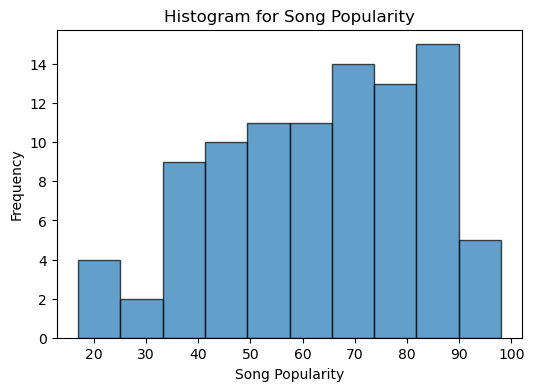

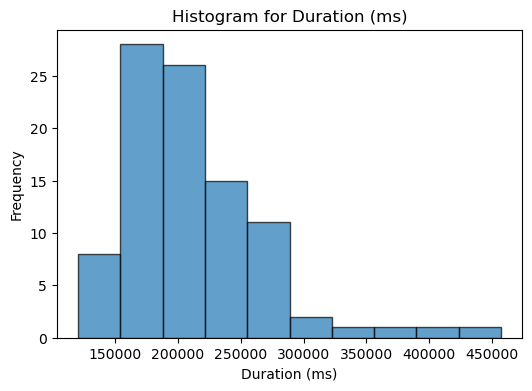

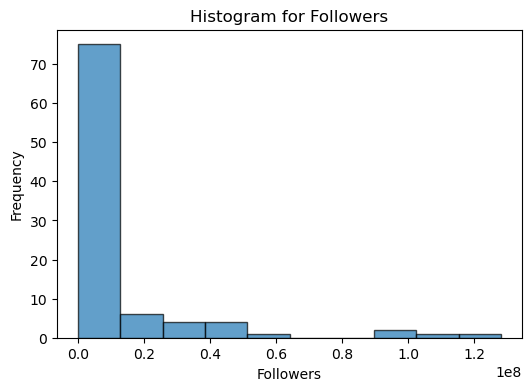

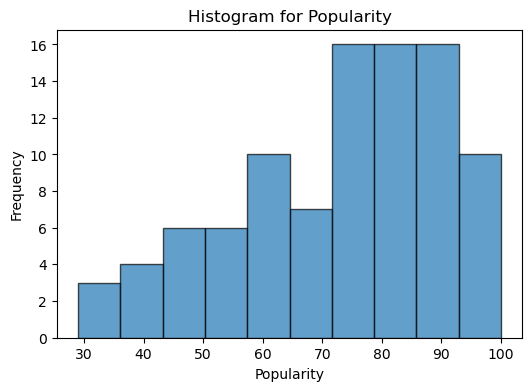

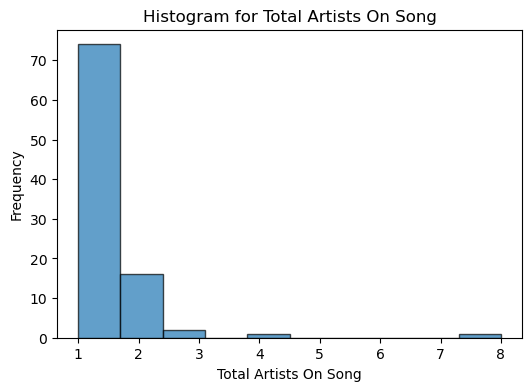

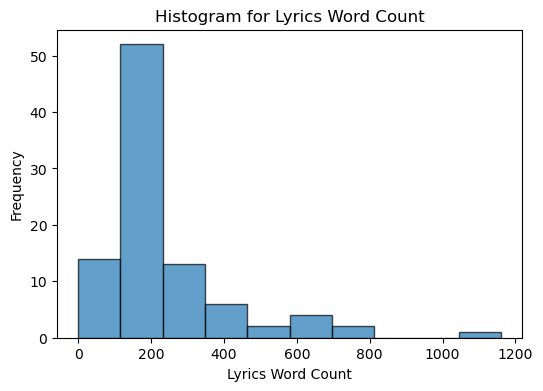

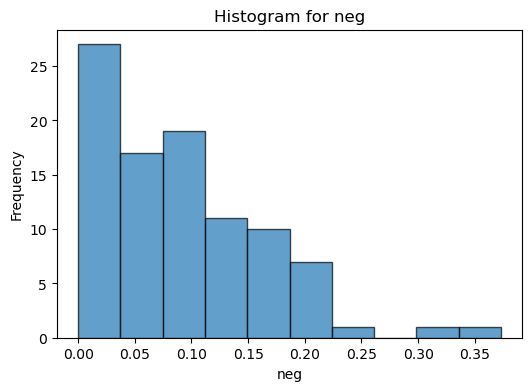

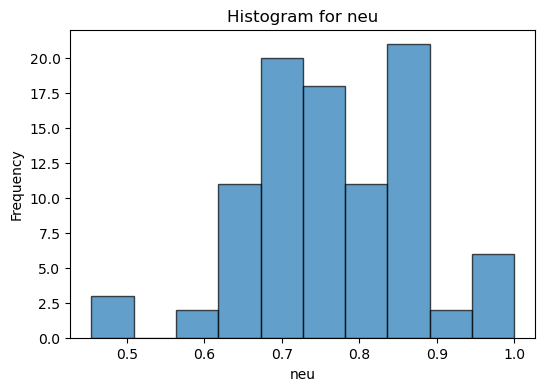

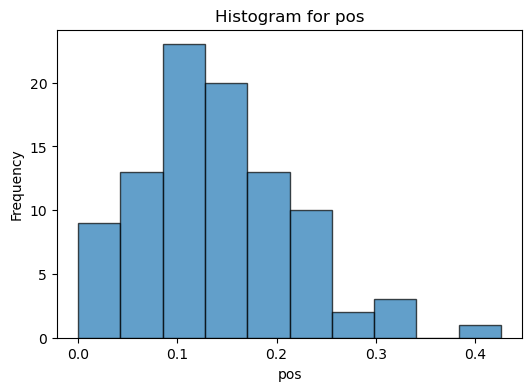

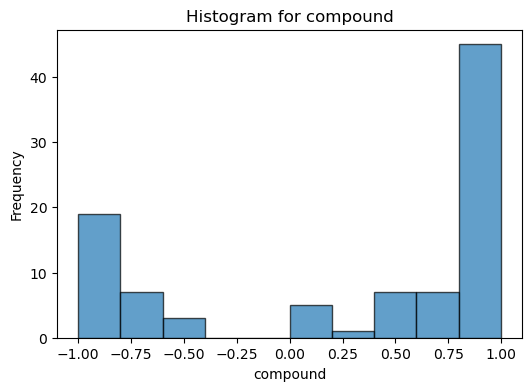

In [7]:
# Create individual histograms for selected columns
columns_to_plot = ['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Total Artists On Song', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(df_cl[column], edgecolor='black', alpha=0.7)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


From the above graphs, it is interesting to observe that the popularity of the song is not as heavily skewed as I thought. Since these are the top songs, I expected the spotify popularity score to be generally very high, but this was not the case. Additionally, it is interesting to see so many trending songs from artists without very many followers on Spotify. I think this is indicative of the popularity that Tik Tok and other social media platforms can provide for less known artists. Despite this, the popularity of the artists on Spotify seems to be heavily skewed. Moving on to analysis about characteristics about the lyrics, it appears that the songs are largely not negative and tend to be more neutral or positive. This can be seen by the histogram for the compound score as well, with this graph showing a large number of songs with a positive compound score.

#### Genre Analysis
I decided to group the really diverse genres into distinct categories. I used chatgpt to create the categories and asked it to give preference to genres that are not pop if multiple genres are included. Then I mapped the genre column to my new categories and made a histogram.

In [8]:
def map_genres_to_categories(genres):
    # Define the mapping of specific genres to broader categories
    genre_mapping = {
        "Pop": [
            "pop", "social media pop", "dance pop", "modern country pop", "gen z singer-songwriter", "colombian pop", 
            "modern indie pop", "power pop", "la pop", "singer-songwriter pop", "uk pop", "alt z"
        ],
        "Indie/Alternative": [
            "indie pop", "modern alternative pop", "indie rock", "small room", "asheville indie", "sacramento indie", 
            "twee pop", "tape club", "bubblegrunge", "bedroom pop", "slacker rock", "irish indie rock", "irish post-punk"
        ],
        "Rock": [
            "album rock", "blues rock", "classic rock", "electric blues", "hard rock", "jam band", "southern rock", 
            "heartland rock", "garage rock", "modern blues rock", "modern rock", "punk blues", "noise rock", "no wave"
        ],
        "Country": [
            "classic texas country", "contemporary country", "country dawn", "country road", "countrygaze", 
            "deep new americana", "roots americana", "classic oklahoma country", "red dirt"
        ],
        "Hip Hop/Rap": [
            "hip hop", "rap", "west coast rap", "pop rap", "melodic rap", "houston rap", "atl hip hop", "trap", 
            "trap queen", "viral rap", "southern hip hop", "dfw rap", "canadian hip hop", "indian underground rap", 
            "desi hip hop", "malayalam hip hop", "irish hip hop", "conscious hip hop"
        ],
        "R&B": [
            "r&b", "alternative r&b", "uk contemporary r&b", "afro r&b"
        ],
        "Latin": [
            "reggaeton", "urbano latino", "trap latino", "reggaeton chileno", "reggaeton colombiano", "latin pop"
        ],
        "Afrobeat/African": [
            "afrobeats", "afropop", "azonto", "nigerian pop", "alte", "nigerian hip hop"
        ],
        "Electronic/Experimental": [
            "art pop", "metropopolis", "ambient folk", "freak folk", "hyperpop", "proto-hyperpop", "bubblegum bass", 
            "digital hardcore", "escape room", "experimental pop", "experimental hip hop", "deconstructed club", 
            "electronica", "glitch", "glitch hop", "jazztronica", "intelligent dance music", "psychedelic hip hop", 
            "wonky", "indietronica", "afrofuturism", "transpop", "uk alternative pop", "crank wave", "jersey club"
        ],
        "K-pop": [
            "k-pop", "k-pop girl group", "anime"
        ],
        "Other": [
            "None Listed"
        ]
    }

    for category, genre_list in genre_mapping.items():
        if genres.split(", ")[0] in genre_list:
            return category
        elif len(genres.split(","))>1:
            if genres.split(", ")[1] in genre_list:
                return category
    return "Other"

df_cl['Simplified Genre'] = df_cl['Genres'].apply(map_genres_to_categories)
df_cl[['Genres','Simplified Genre']].head()

Genres   Simplified Genre
0                                        indie pop  Indie/Alternative
1  conscious hip hop, hip hop, rap, west coast rap        Hip Hop/Rap
2                      modern country pop, pop rap                Pop
3                                              pop                Pop
4                                     art pop, pop                Pop

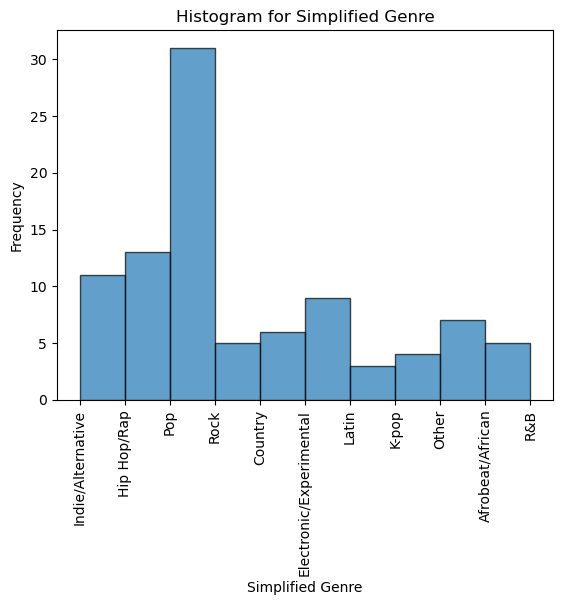

In [9]:
plt.hist(df_cl['Simplified Genre'], edgecolor='black', alpha=0.7)
plt.title(f"Histogram for Simplified Genre")
plt.xlabel("Simplified Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

From this, we can see that pop clearly dominates the top of the charts, but there is still a lot of diversity in the genre.

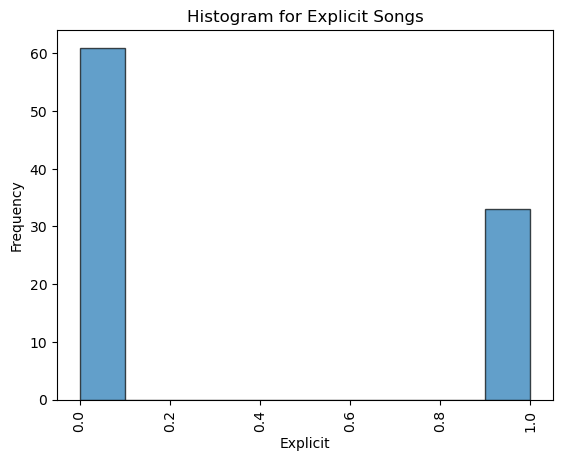

In [10]:
plt.hist(df_cl['Explicit'].astype(int), edgecolor='black', alpha=0.7)
plt.title(f"Histogram for Explicit Songs")
plt.xlabel("Explicit")
plt.ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

Most songs are not explicit but some of them are.

### Bivariate and Multivariate Analysis

In [11]:
# Create a new column with bins of size 10
df_cl["Ranking Group"] = pd.cut(
    df_cl["Song Rank"], 
    bins=range(0, 101, 10),
    labels=[f"{i+1}-{i+10}" for i in range(0, 100, 10)],
    right=True
)
df_cl["Top 10 Song"] = df_cl["Song Rank"].apply(lambda x: 1 if x <= 10 else 0)
df_cl[["Ranking Group", "Song Rank", "Top 10 Song"]]


Ranking Group  Song Rank  Top 10 Song
0           1-10          1            1
1           1-10          2            1
2           1-10          3            1
3           1-10          4            1
4           1-10          5            1
..           ...        ...          ...
89        91-100         96            0
90        91-100         97            0
91        91-100         98            0
92        91-100         99            0
93        91-100        100            0

[94 rows x 3 columns]

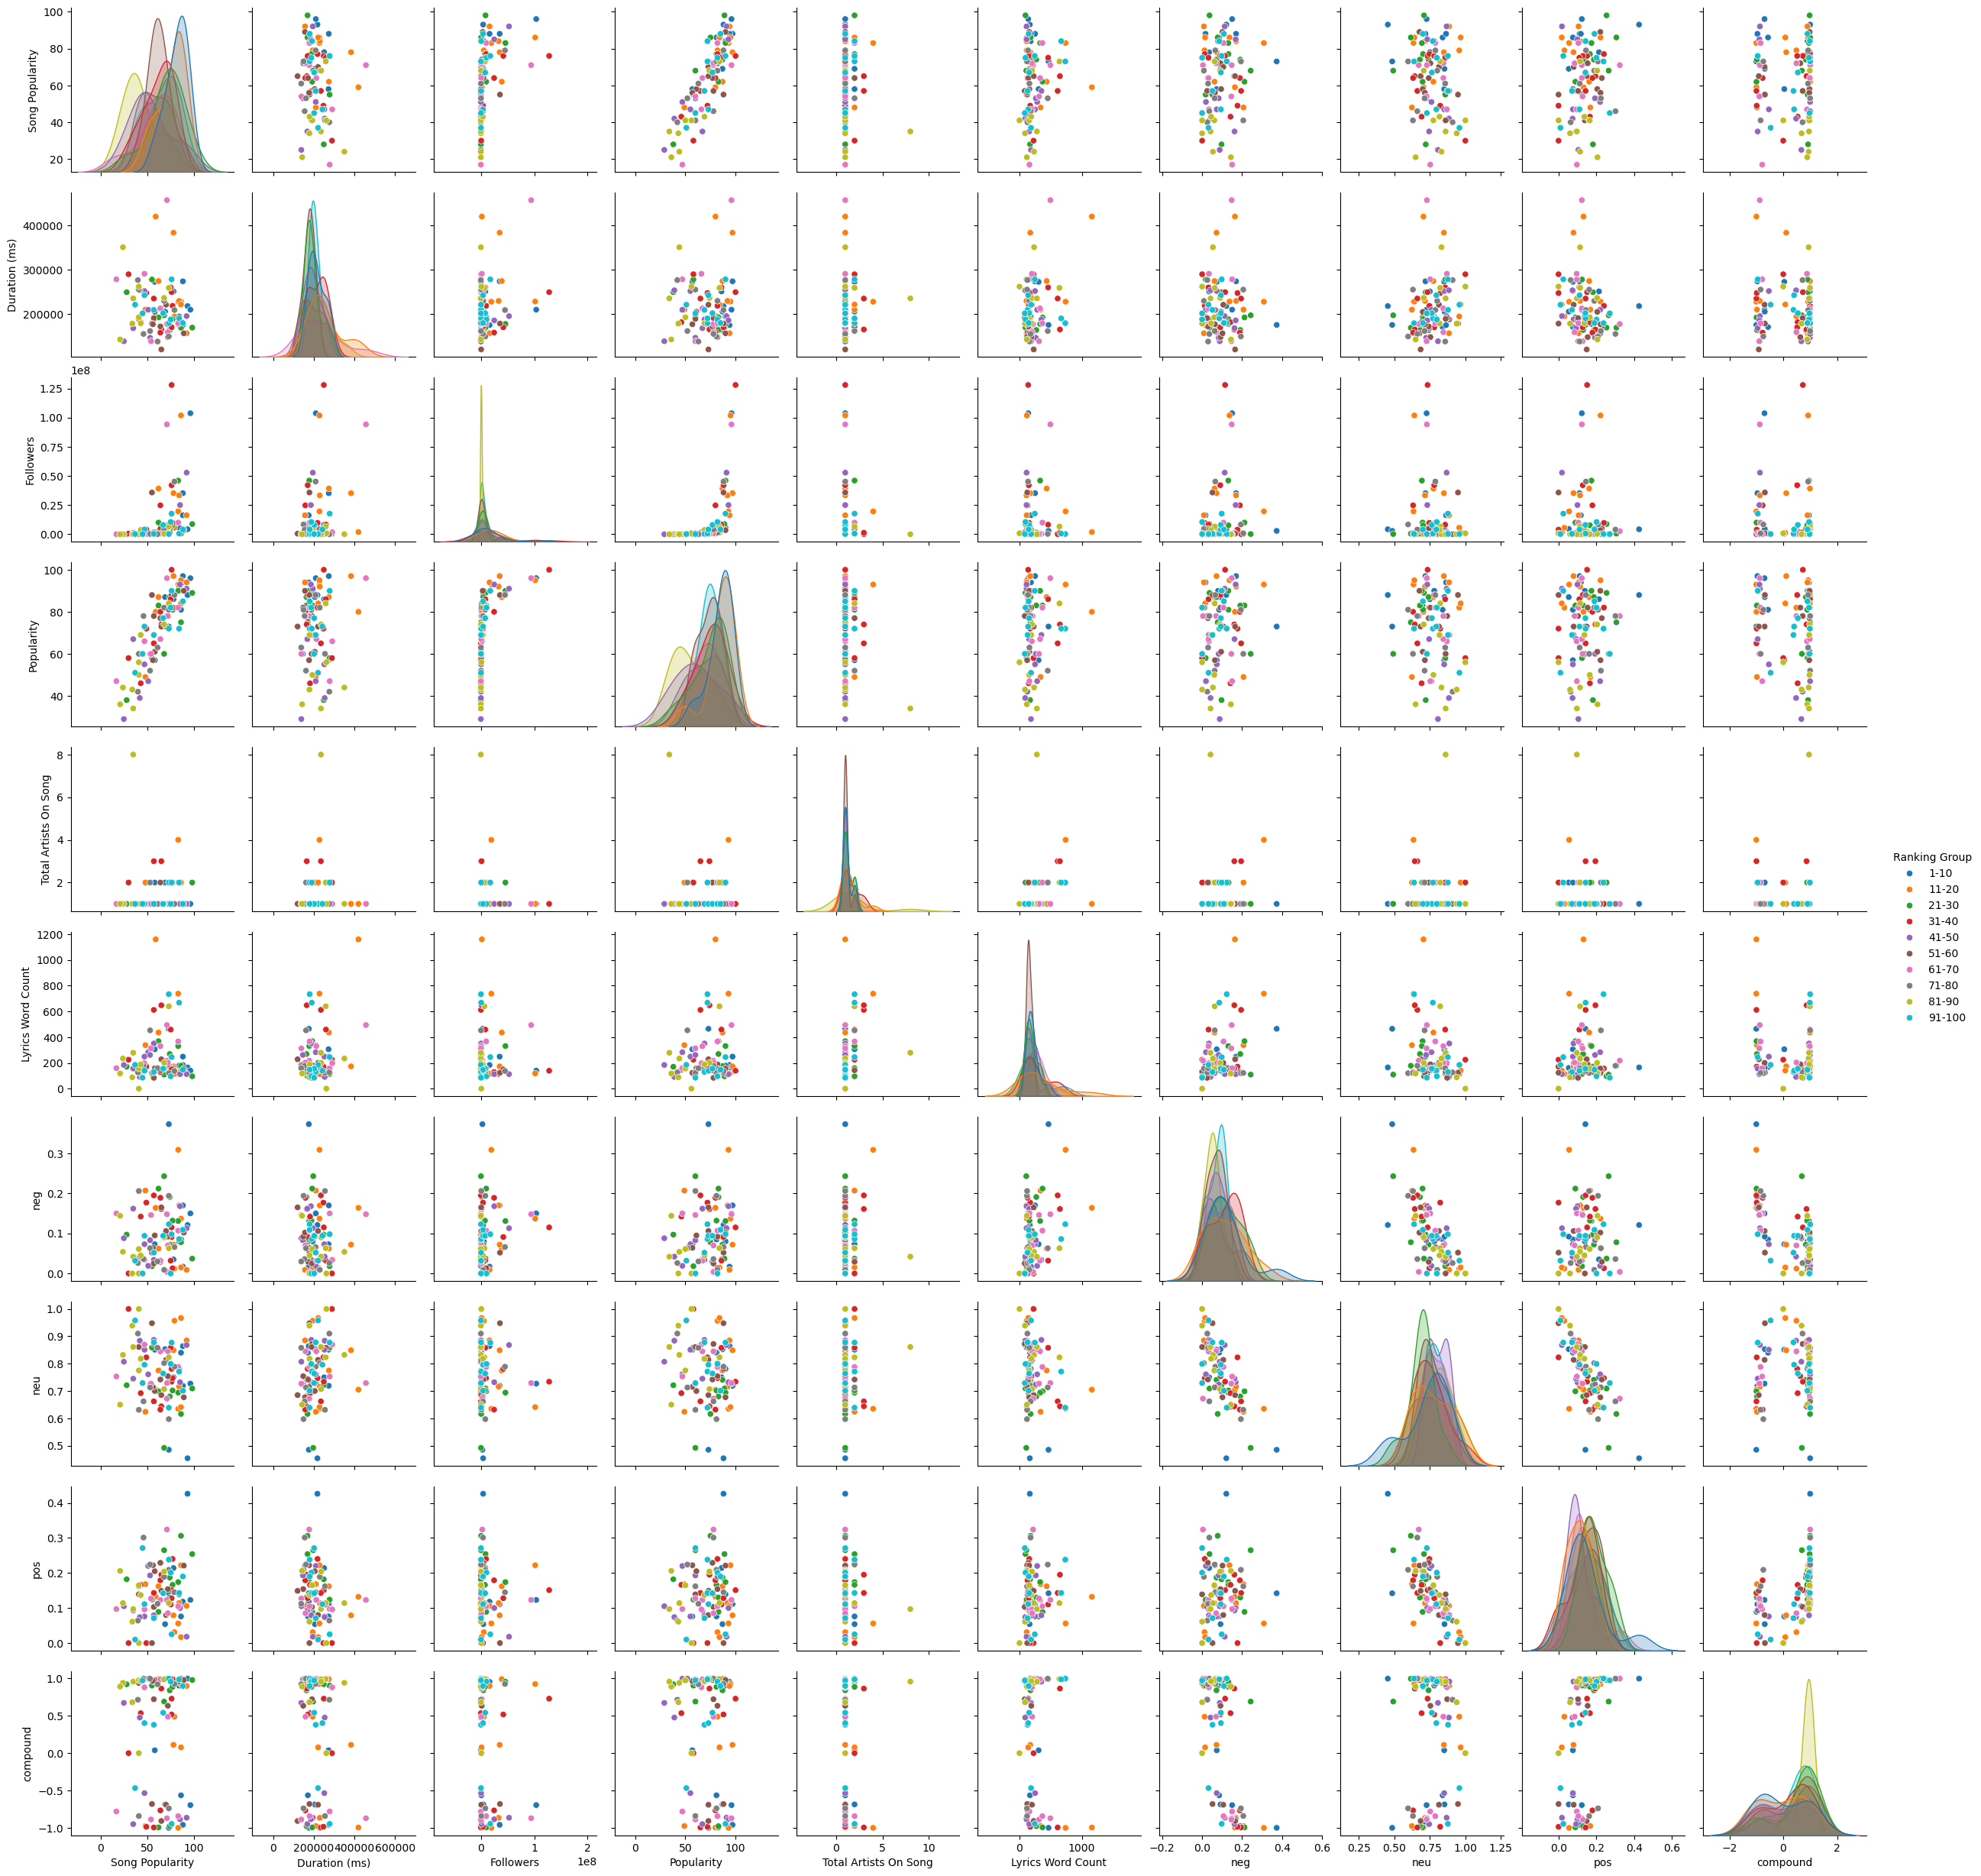

In [12]:
sns.pairplot(df_cl[['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Total Artists On Song', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound', 'Ranking Group']], hue="Ranking Group")

The above graph is a pairplot of the numeric columns and the hue is the ranking groups that I made to bin ranking by groups of 10. I'm not seeing any clear clusters appearing here between any of the variables. There is a positive linear relationship between artist popularity and song popularity though. This might be expected due to the way that spotify calculates this popularity and this high correlation might mean we should remove one of these variables when creating models.

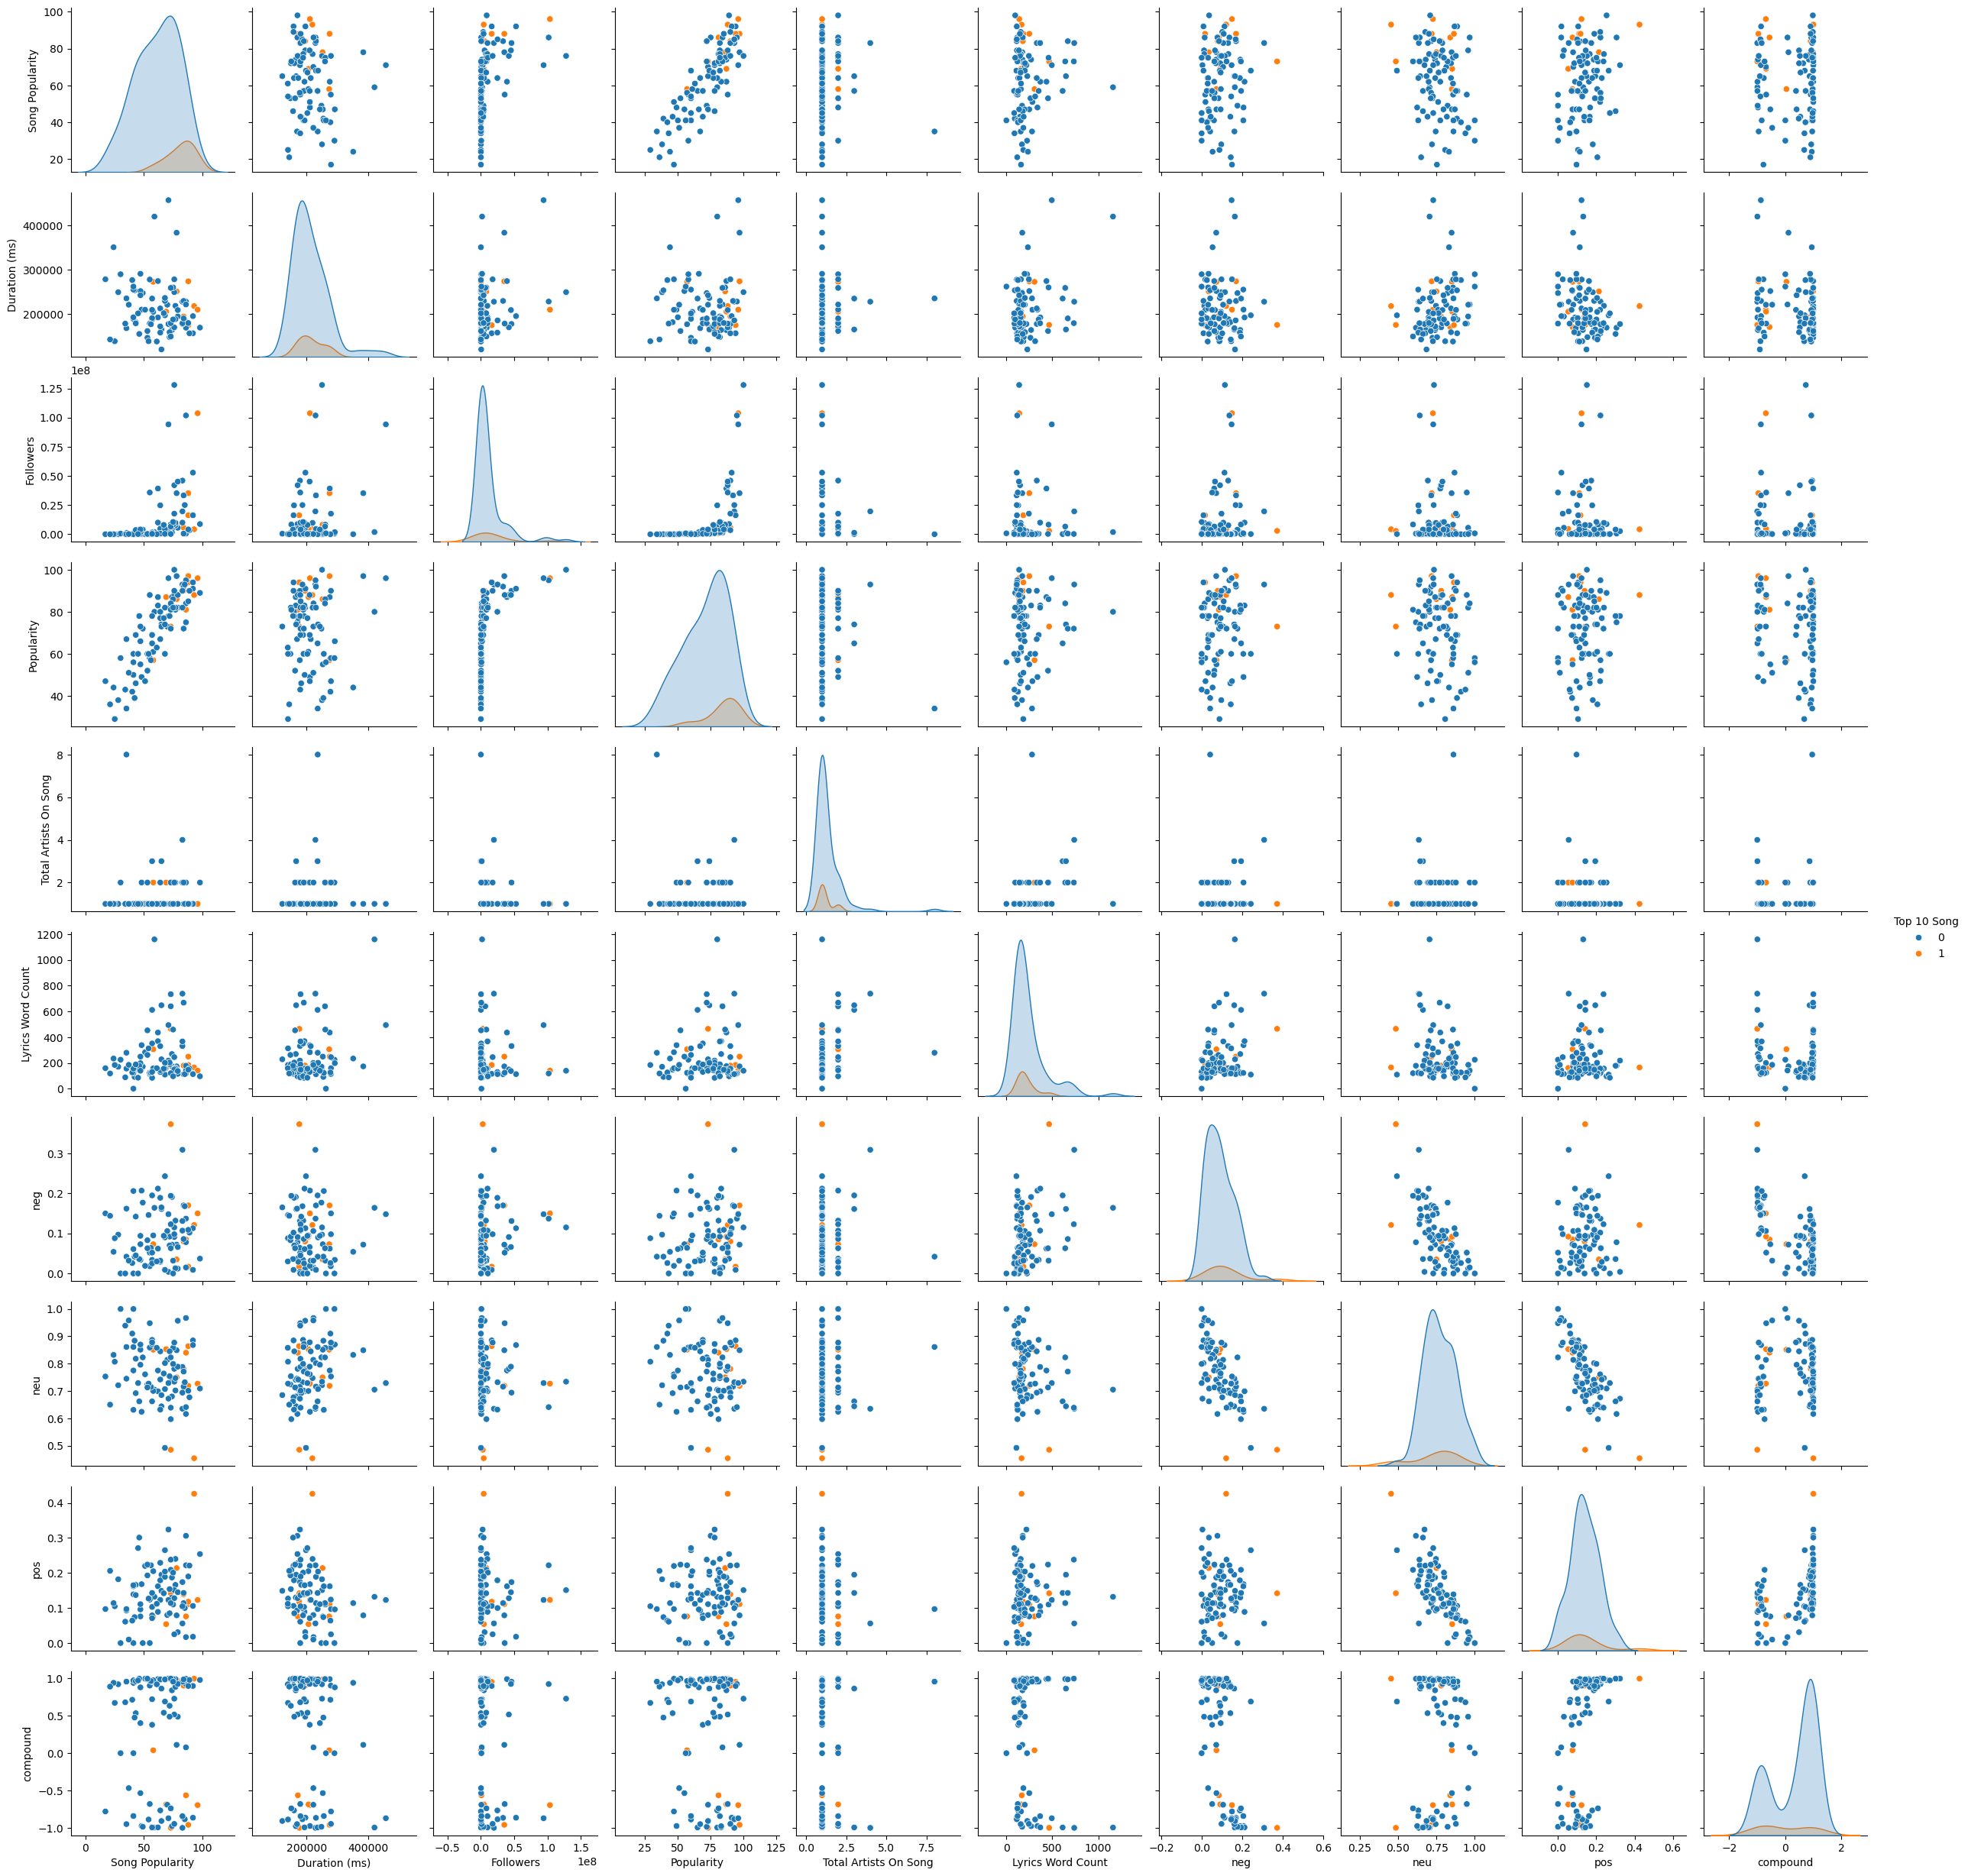

In [13]:
sns.pairplot(df_cl[['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Total Artists On Song', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound', 'Top 10 Song']], hue="Top 10 Song")

This is a pairplot where only the top 10 songs are colored. There aren't many clear distinctions but I am curious about the clustering in the scatter plot between song popularity and song duration as well as song popularity and positive sentiment score.

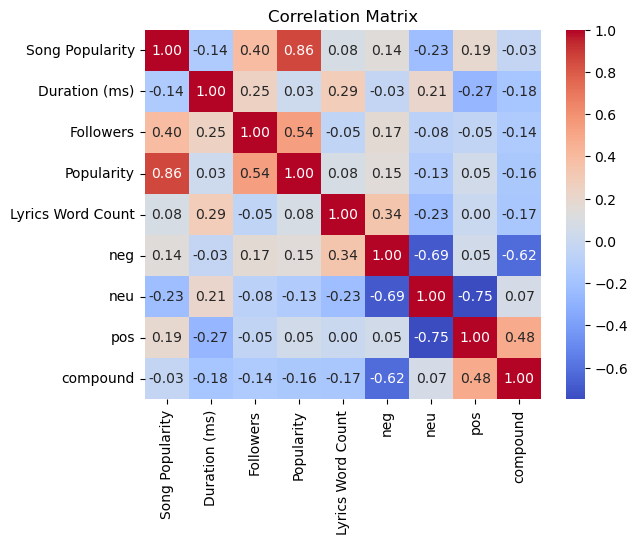

In [14]:
corr = df_cl[['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 
              'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound']].corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

This correlation plot confirms my earlier observations about popularity and song popularity being highly correlated. It also shows the relationships between the various outputs of VADER which is to be expected and might require that we only use one of the 4 output scores during analysis. There is also the obvious correlation between lyrics word count and duration, although I expected this to be much higher. I think the slight correlation between negative lyric sentiment and lyric word count is interesting. There is also a slight negative correlation between positive lyric sentiment and song duration.

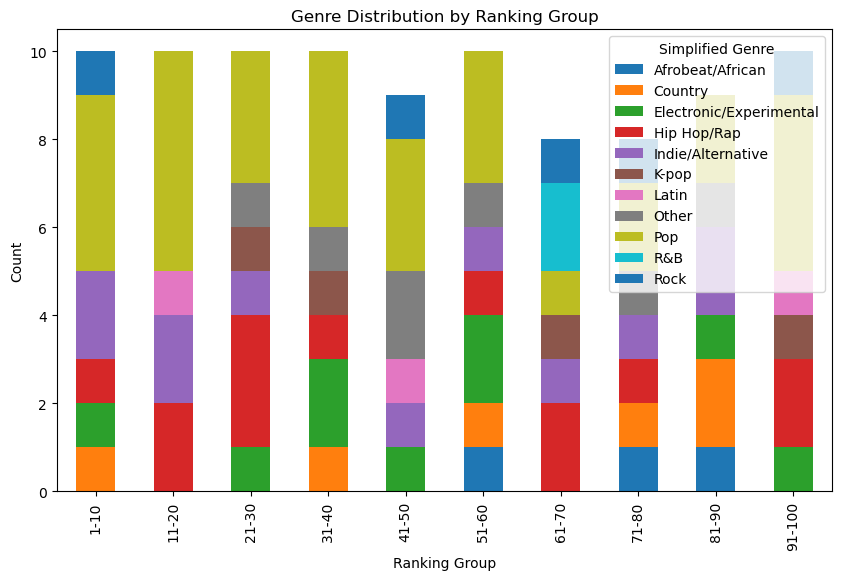

In [15]:
genre_counts = df_cl.groupby(['Ranking Group', 'Simplified Genre'], observed=True).size().unstack()
genre_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Genre Distribution by Ranking Group")
plt.xlabel("Ranking Group")
plt.ylabel("Count")
plt.show()

This is a breakdown of the genres by ranking group. The distribution of genres seems to be unchanged across the different ranking groups (as in there is a mix of genres across each group). However, some genres don't appear at all in the top 20, including K-Pop and R&B.

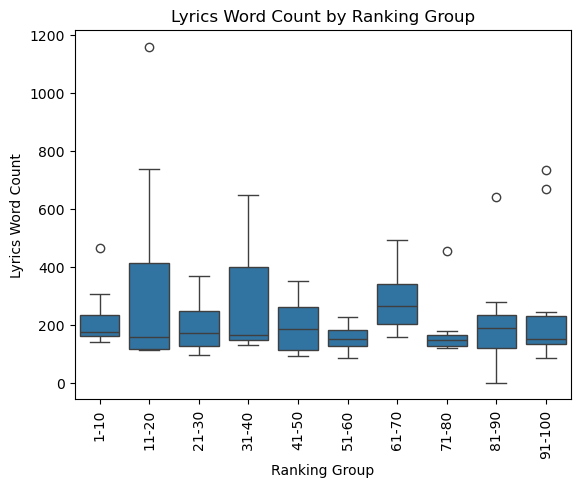

In [16]:
sns.boxplot(data=df_cl, x='Ranking Group', y='Lyrics Word Count')
plt.title("Lyrics Word Count by Ranking Group")
plt.xticks(rotation=90)
plt.show()

This is a breakdown of the word count by group, with the highest and lowest word count groups not being in the top 10. 

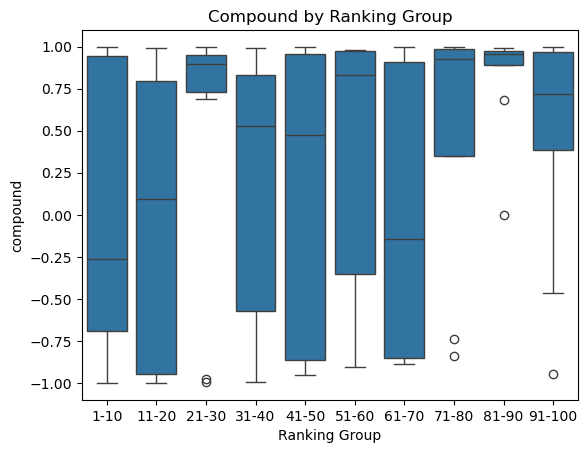

In [17]:
sns.boxplot(data=df_cl, x='Ranking Group', y='compound')
plt.title("Compound by Ranking Group")
plt.show()

This is a graph of the compound score by ranking group. Overall, the median seems to increase as the rankings increase, possibly indicating that songs that are ranked higher are less positive (or even negative).

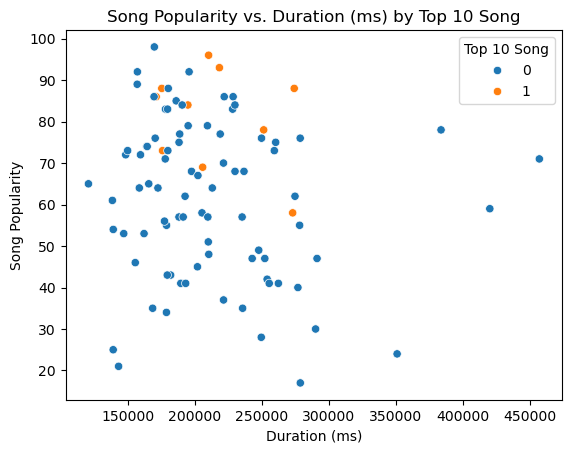

In [18]:
sns.scatterplot(x='Duration (ms)', y='Song Popularity', hue='Top 10 Song', data=df_cl)
plt.title("Song Popularity vs. Duration (ms) by Top 10 Song")
plt.show()

This scatter plot shows the Duration of the song vs it's popularity. It seems that the most popular songs are between 150000 and 275000 ms, with most of the top 10 songs falling between 175000 and 225000.

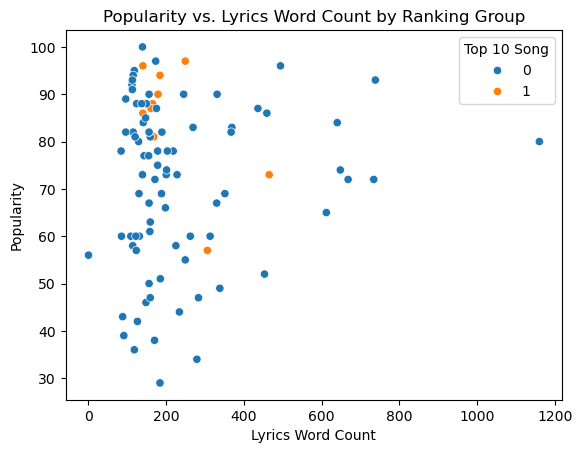

In [19]:
sns.scatterplot(x='Lyrics Word Count', y='Popularity', hue='Top 10 Song', data=df_cl)
plt.title("Popularity vs. Lyrics Word Count by Ranking Group")
plt.show()


This scatter plot shows the word count of the song vs it's popularity. Most of the top 10 songs are concentrated between 150 and 300, with only 2 outliers for this.

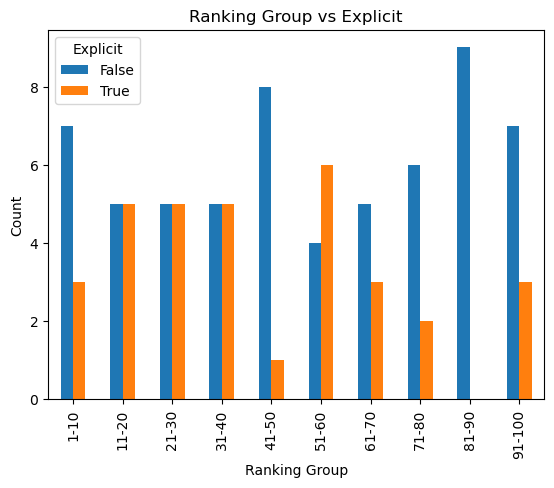

In [20]:
# Create crosstab for Ranking Group vs Explicit
explicit_ranking_crosstab = pd.crosstab(df_cl['Ranking Group'], df_cl['Explicit'])

# Plot a grouped bar plot
explicit_ranking_crosstab.plot(kind='bar', stacked=False)
plt.title('Ranking Group vs Explicit')
plt.xlabel('Ranking Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Explicit')
plt.show()


This graph shows the distribution of explicit songs in each category. For the middle categories, it is interesting that there is a perfect split between explicit and not explicit songs. The top category has far more non explicit songs compared to explicit songs. This is also true of the bottom categories, however, so this might not be the most predictive feature.

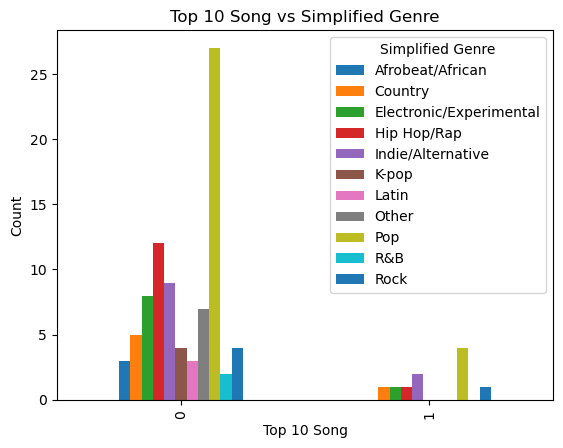

In [21]:
# Create crosstab for Top 10 Song vs Simplified Genre
top10_genre_crosstab = pd.crosstab(df_cl['Top 10 Song'], df_cl['Simplified Genre'])

# Plot a grouped bar plot
top10_genre_crosstab.plot(kind='bar', stacked=False)
plt.title('Top 10 Song vs Simplified Genre')
plt.xlabel('Top 10 Song')
plt.ylabel('Count')
plt.legend(title='Simplified Genre')
plt.show()


This is another look at the distribution of genres between top 19 songs and not top 10 songs. There are a lot of cateogries missing from the top 10 and the heaviest weight is on pop and indie, which could be a good predictor of the top songs.

### Data Distribution and Normalization

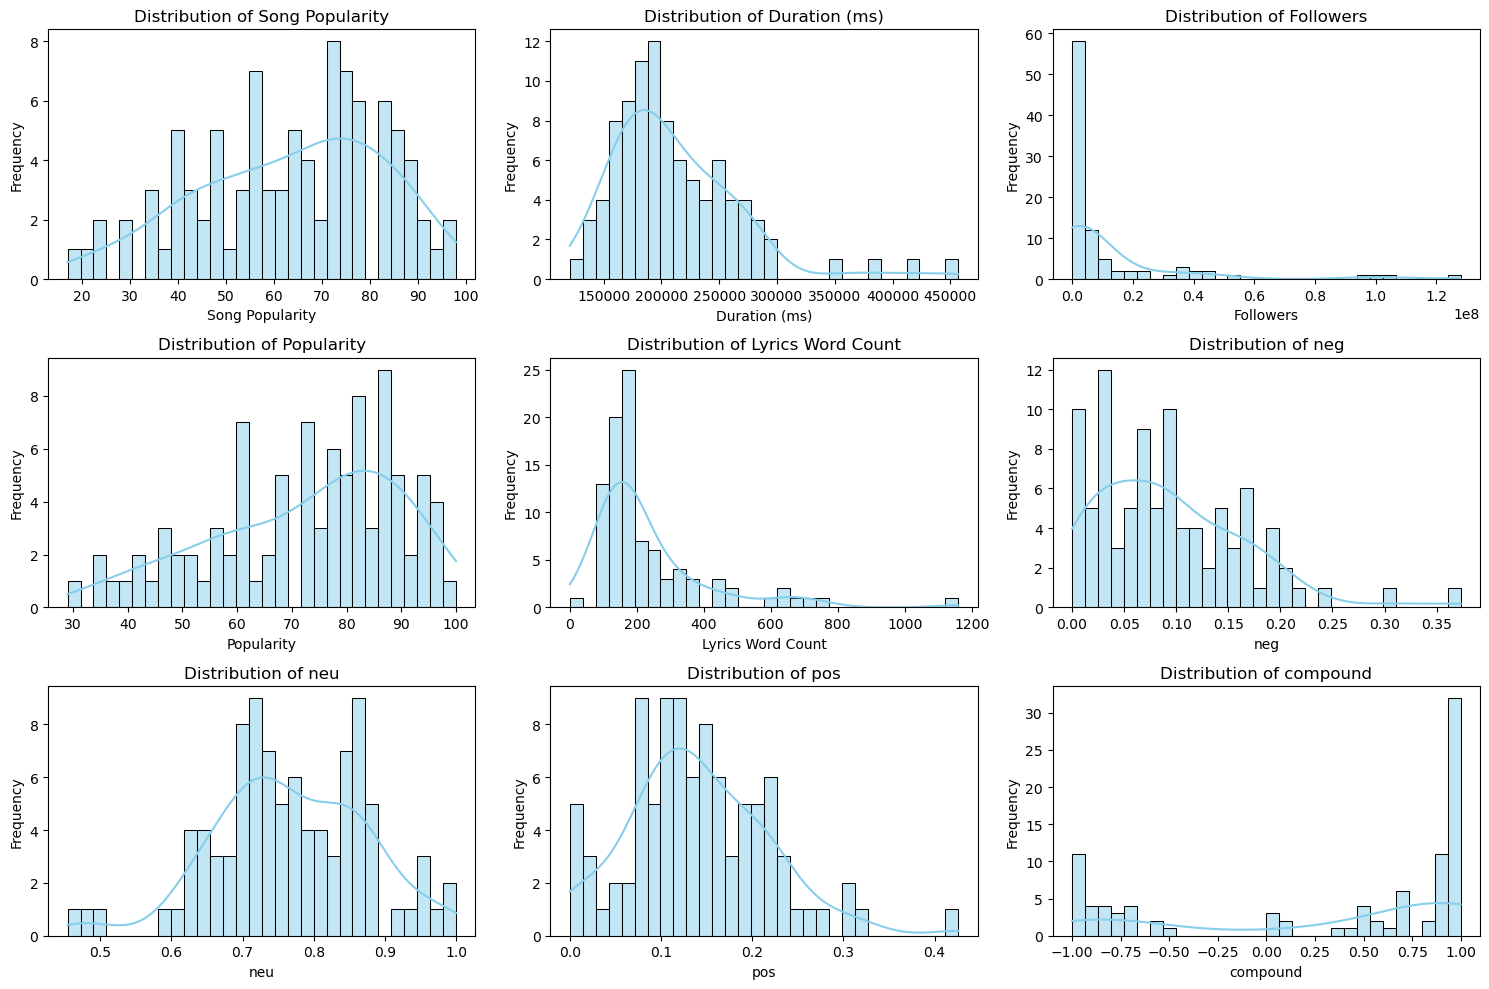

In [22]:
continuous_columns = ['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound']

# Create histograms and density plots for each continuous column
plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 4 columns
    sns.histplot(df_cl[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This is a figure for a histogram and density plot for each of the continuous variables of interest.

- Song popularity: roughly bell shaped, some skewing, most songs between 40-90 - relatively evenly distributed with a more songs having a higher popularity
- Duration: high right skew, most songs are shorter (2.5-3 minutes) with very few songs having longer durations
- Followers: highly skewed, few artists have a large number of followers while most have low follower counts
- Artist Popularity: rough bell curve, somewhat skewed, concentrated in 70-90 range, most songs come from popular artists
- Word Count: most have fewer than 200 words, right skew
- Negative sentiment: Relatively even spread from 0-0.3, most have low neg sentiment
- Netural sentiment: most between 0.7-0.9, pretty even, most have medium to high neutral
- Positive sentimet: slightly bell shaped, right skew, scores between 0.05-0.15, pretty low pos sentiment overall
- Compound: mis of pos and neg values but most are closer to 0 than extremes (except for positive 1)

Most of the variables are skewed. Some variable might be normal-like but are still skewed.

In [23]:
from scipy.stats import skew, kurtosis

skewness = df_cl[continuous_columns].apply(skew)
kurt = df_cl[continuous_columns].apply(kurtosis)

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)


Skewness:
Song Popularity     -0.377718
Duration (ms)        1.665246
Followers            3.097444
Popularity          -0.588679
Lyrics Word Count    2.480521
neg                  1.076954
neu                 -0.235075
pos                  0.610432
compound            -0.647878
dtype: float64

Kurtosis:
Song Popularity     -0.671813
Duration (ms)        4.075121
Followers            9.910030
Popularity          -0.565867
Lyrics Word Count    7.537863
neg                  1.705756
neu                  0.266109
pos                  1.037166
compound            -1.363075
dtype: float64


The skewness and kurtosis test results confirm the above findings. Followers, Duration, and Lyrics Word Count all have a highly positive kurtosis, indicating a lot of outliers.

In [24]:
# Apply log transformation to variables with high skewness
df_cl['Duration (ms)_transf'] = np.log1p(df_cl['Duration (ms)'])  # log1p handles zero values (log(1+x))
df_cl['Followers_transf'] = np.log1p(df_cl['Followers'])  # log1p handles zero values
df_cl['Lyrics Word Count_transf'] = np.log1p(df_cl['Lyrics Word Count'])  # log1p handles zero values

# Check the transformations
df_cl[['Duration (ms)', 'Followers', 'Lyrics Word Count']].describe()


Duration (ms)     Followers  Lyrics Word Count
count      94.000000  9.400000e+01          94.000000
mean   212252.319149  1.163717e+07         233.702128
std     57749.294460  2.373635e+07         179.263177
min    120792.000000  1.273000e+03           0.000000
25%    175601.000000  2.208655e+05         132.500000
50%    196731.500000  1.710836e+06         169.000000
75%    241314.500000  8.641217e+06         258.750000
max    456933.000000  1.280014e+08        1160.000000

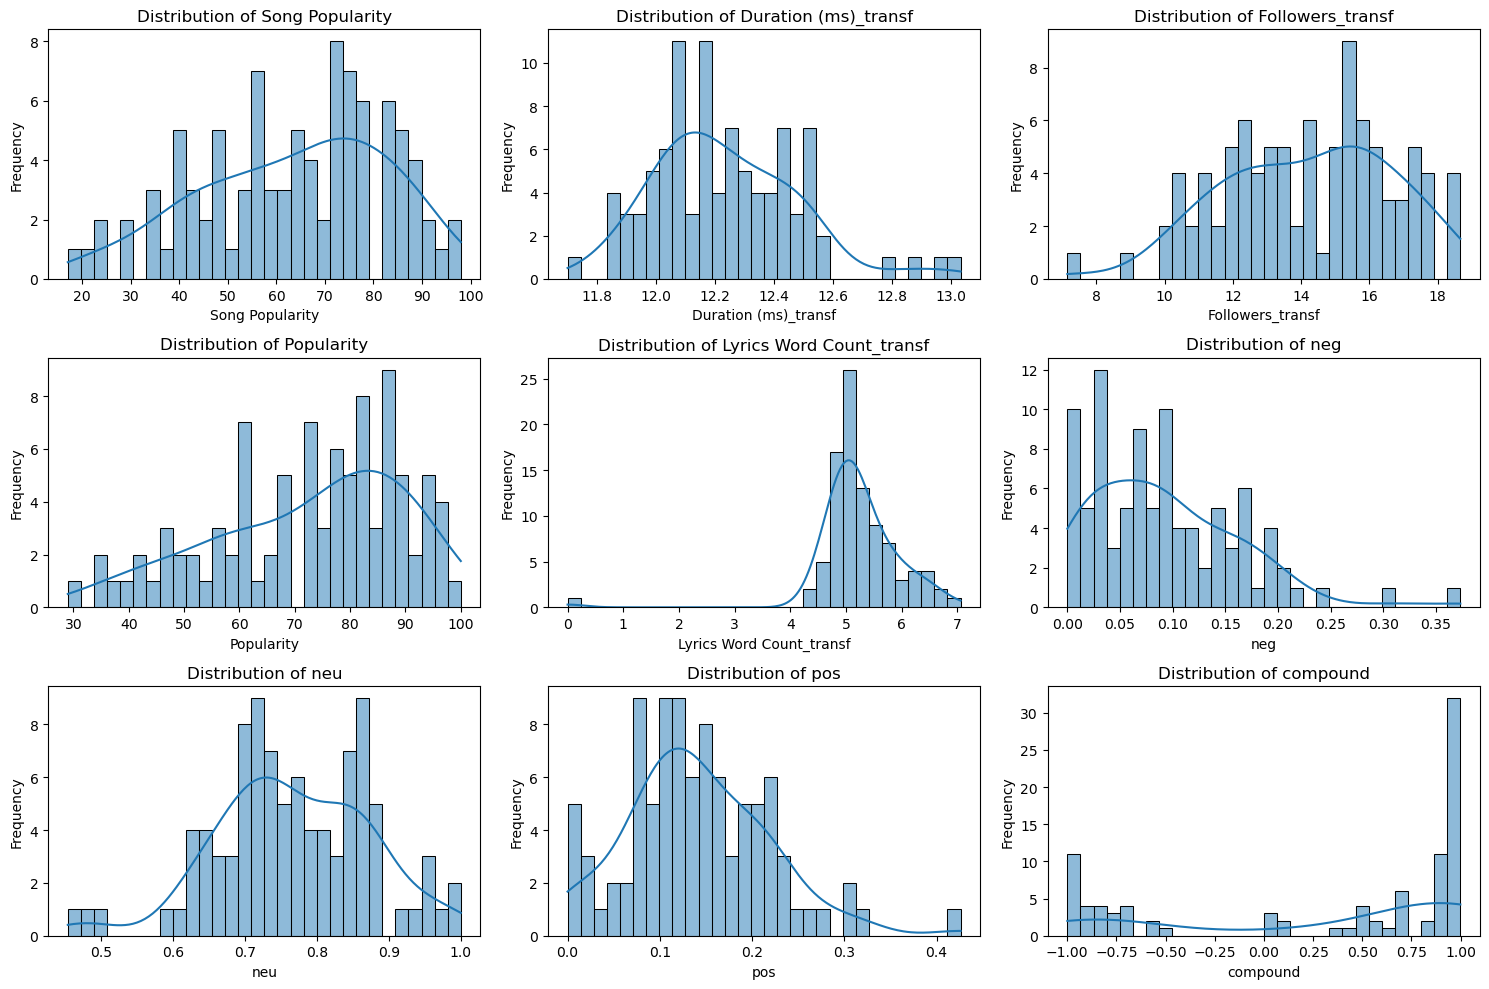

In [25]:
continuous_columns = ['Song Popularity', 'Duration (ms)_transf', 'Followers_transf', 'Popularity', 'Lyrics Word Count_transf', 'neg', 'neu', 'pos', 'compound']

# Create histograms and density plots for each continuous column
plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 4 columns
    sns.histplot(df_cl[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


I decided to apply a log transformation to Duration, Followers, and Word Count so that their distributions would be much less skewed. After looking at the histograms and density plots, I can see that this in fact helped the skewness and helped make the data more normal. Doing this will allow for clustering models to fit better on the data and make for a more clear insights about the data. It also decreases the outliers that'll impact the model.

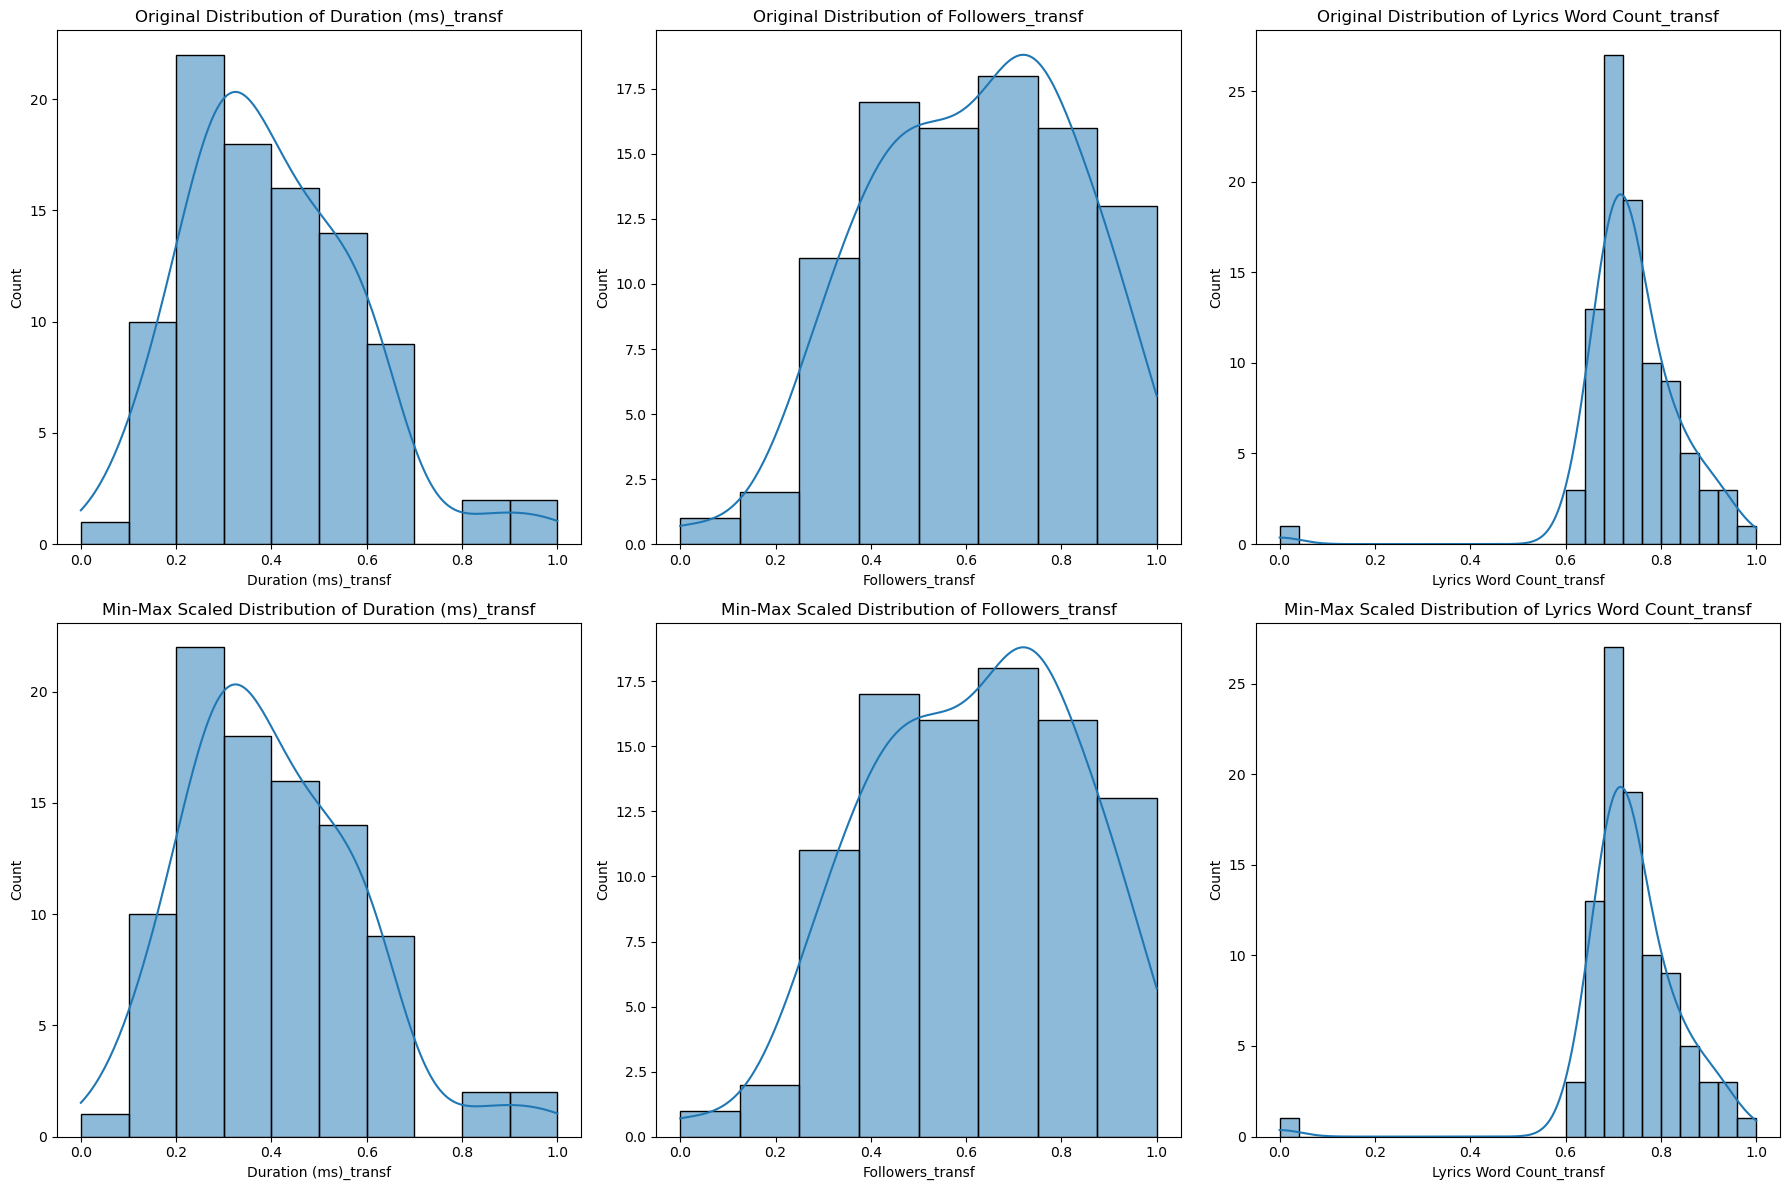

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_cl['Popularity'] = df_cl['Popularity']/100
df_cl['Song Popularity'] = df_cl['Song Popularity']/100

# Selecting columns that were transformed
columns_to_normalize = ['Duration (ms)_transf', 'Followers_transf', 'Lyrics Word Count_transf']

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling
df_cl_minmax = df_cl[columns_to_normalize].copy()
df_cl_minmax[columns_to_normalize] = min_max_scaler.fit_transform(df_cl_minmax[columns_to_normalize])

# Plotting the results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original distributions
for i, column in enumerate(columns_to_normalize):
    sns.histplot(df_cl[column], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Original Distribution of {column}")
    
# Normalized distributions
for i, column in enumerate(columns_to_normalize):
    sns.histplot(df_cl_minmax[column], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"Min-Max Scaled Distribution of {column}")

plt.tight_layout()
plt.show()


In [29]:
df_cl[columns_to_normalize] = df_cl_minmax[columns_to_normalize]
df_cl.describe()

Song Popularity  Duration (ms)   Song Rank     Followers  Popularity  \
count        94.000000      94.000000   94.000000  9.400000e+01   94.000000   
mean          0.635106  212252.319149   49.372340  1.163717e+07    0.726277   
std           0.192280   57749.294460   29.438467  2.373635e+07    0.172284   
min           0.170000  120792.000000    1.000000  1.273000e+03    0.290000   
25%           0.482500  175601.000000   24.250000  2.208655e+05    0.600000   
50%           0.660000  196731.500000   48.500000  1.710836e+06    0.770000   
75%           0.777500  241314.500000   75.500000  8.641217e+06    0.867500   
max           0.980000  456933.000000  100.000000  1.280014e+08    1.000000   

       Total Artists On Song  Lyrics Word Count        neg        neu  \
count              94.000000          94.000000  94.000000  94.000000   
mean                1.319149         233.702128   0.092543   0.767011   
std                 0.882479         179.263177   0.071248   0.107798   
min                 1.000000           0.000000   0.000000   0.454000   
25%                 1.000000         132.500000   0.034250   0.701250   
50%                 1.000000         169.000000   0.084000   0.757500   
75%                 1.000000         258.750000   0.140750   0.851000   
max                 8.000000        1160.000000   0.373000   1.000000   

             pos  compound  Top 10 Song  Duration (ms)_transf  \
count  94.000000  94.00000    94.000000             94.000000   
mean    0.140436   0.29302     0.106383              0.400155   
std     0.077664   0.79927     0.309980              0.183601   
min     0.000000  -0.99980     0.000000              0.000000   
25%     0.093750  -0.68960     0.000000              0.281211   
50%     0.131000   0.71875     0.000000              0.366607   
75%     0.189750   0.96500     0.000000              0.520095   
max     0.426000   0.99840     1.000000              1.000000   

       Followers_transf  Lyrics Word Count_transf  
count         94.000000                 94.000000  
mean           0.613816                  0.741318  
std            0.213827                  0.110045  
min            0.000000                  0.000000  
25%            0.447585                  0.693480  
50%            0.625233                  0.727753  
75%            0.765952                  0.787792  
max            1.000000                  1.000000

Using min-max scaling on these 3 columns changes them from a scale on the hundreds of thousands to a scale from 0 to 1. This will make sure that these features don't disproportionately have a bigger influence on a model. It also puts these features on an equal scale as all of the other features which will be very beneficial when running clustering algorithms.

In [32]:
df_cl.to_csv('../../data/processed-data/transformed_data.csv')

### Statistical Insights

In [42]:
from scipy.stats import ttest_ind

# Split data into two groups
top_10 = df_cl[df_cl['Top 10 Song'] == 1]['Followers_transf']
not_top_10 = df_cl[df_cl['Top 10 Song'] == 0]['Followers_transf']

# Perform independent samples T-test
t_stat, p_val = ttest_ind(top_10, not_top_10, equal_var=False)  # Welch's T-test

# Output results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The difference in Followers between Top 10 Songs and others is statistically significant.")
else:
    print("No significant difference in Followers between Top 10 Songs and others.")

T-statistic: 2.4122, P-value: 0.0303
The difference in Followers between Top 10 Songs and others is statistically significant.


In [41]:
from scipy.stats import f_oneway

# Group data by Ranking Group
group_1 = df_cl[df_cl['Ranking Group'] == '1-10']['Lyrics Word Count_transf']
group_2 = df_cl[df_cl['Ranking Group'] == '11-20']['Lyrics Word Count_transf']
group_3 = df_cl[df_cl['Ranking Group'] == '21-30']['Lyrics Word Count_transf']
group_4 = df_cl[df_cl['Ranking Group'] == '31-40']['Lyrics Word Count_transf']

# Perform ANOVA
f_stat, p_val = f_oneway(group_1, group_2, group_3, group_4)

# Output results
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There are significant differences in Song Popularity across Ranking Groups.")
else:
    print("No significant differences in Song Popularity across Ranking Groups.")


F-statistic: 0.4504, P-value: 0.7186
No significant differences in Song Popularity across Ranking Groups.


## Conclusions and Next Steps
Summarize your findings, interpret the results, and discuss their technical implications.
- **Summary of EDA Findings**:
    - Highlight the main takeaways from the EDA process (key trends, patterns, data quality issues).
- **Implications for Modeling**:
    - Discuss how your EDA informs the next steps in your project (e.g., feature selection, data transformations).
    - Outline any further data cleaning or preparation required before moving into modeling.